# **Problem Statement:**
Here I developed a neural network model capable of accurately classifying handwritten digits from the MNIST dataset.

# **Description:**
The MNIST dataset is a widely used dataset in the field of machine learning and computer vision. It consists of 28x28 pixel grayscale images of handwritten digits (0-9) along with their corresponding labels. The goal of this project is to train a neural network model that can correctly identify the digits present in these images.

The MNIST dataset contains a large number of labeled images, making it suitable for training and evaluating machine learning models. It is commonly used for tasks such as digit recognition and image classification.

# **Use Cases:**
######**Digital Document Processing:**
Handwritten digit recognition can be integrated into document scanning and digitization systems to automatically convert handwritten numbers in documents into machine-readable text. This can streamline data extraction processes in various industries, such as healthcare and finance.

######**Bank Check Processing:**
 Banks and financial institutions can use handwritten digit recognition to automate the processing of handwritten checks. The model can extract the numerical amounts written on checks, reducing manual data entry errors and improving processing efficiency.
######**Biometric Authentication:**
 The model can be used in authentication systems to verify users based on handwritten signatures or PIN codes.

# **Loading required Packages and Dataset**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# Import the MNIST dataset from TensorFlow.keras.datasets.
from tensorflow.keras.datasets import mnist

# Import the Sequential model from TensorFlow.keras.models.
from tensorflow.keras.models import Sequential

# Import the Dense layer type from TensorFlow.keras.layers.
from tensorflow.keras.layers import Dense

# Import the to_categorical utility function from TensorFlow.keras.utils.
from tensorflow.keras.utils import to_categorical

# **Data Splitting**

In [2]:
# load dataset
(x_train, y_train) , (x_test, y_test) = mnist.load_data()

# **Display the Dataset**

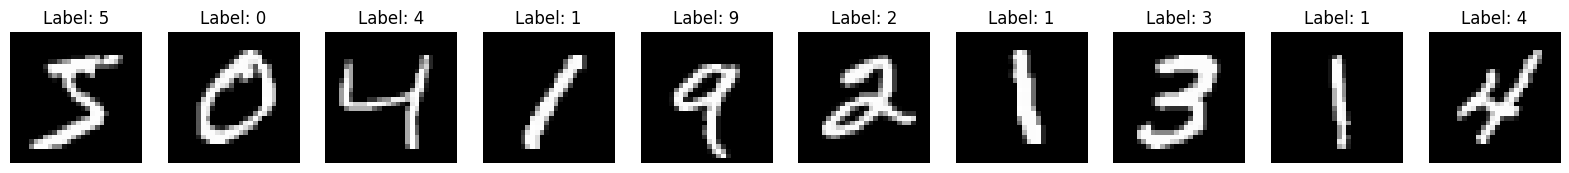

In [3]:
# Number of digits to display
n = 10

# Create a figure to display images
plt.figure(figsize = (20,4))

for i in range(n):
  #Create a subplot within figure
  plt.subplot(2, n, i+1)
  plt.imshow(x_train[i], cmap = 'gray')
  plt.title(f'Label: {y_train[i]}')
  plt.axis('off')

# **Dimensions of Data**

In [4]:
# Print previous shape of x and y
print(f"Previous shape of x_train: {x_train.shape}")
print(f"Previous shape of x_test: {x_test.shape}")

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

print(f"New shape of x_train: {x_train.shape}")
print(f"New shape of x_test: {x_test.shape}")

Previous shape of x_train: (60000, 28, 28)
Previous shape of x_test: (10000, 28, 28)
New shape of x_train: (60000, 784)
New shape of x_test: (10000, 784)


# **MinMax Scaling**

In [5]:
# Convert the data type of images to float32
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

# **Preprocess the Target Variable**

In [6]:
from tensorflow.keras.utils import to_categorical

# Number of classes in dataset
classes = 10

# Convert labels to one hot encoded format
y_train = to_categorical(y_train, classes)
y_test = to_categorical(y_test, classes)

# Print the shapes
print(f"Shape of y_train: {y_train.shape}\n Shape of y_test: {y_test.shape}")

Shape of y_train: (60000, 10)
 Shape of y_test: (10000, 10)


# **Setting up Hyperparameters**

In [7]:
input_size = 784
batch_size = 200
hidden1 = 400
hidden2 = 200
hidden3 = 10   #No of classes
epochs = 10

In [8]:
model = Sequential([
    Dense(hidden1, input_dim = input_size , activation= 'relu'),
    Dense(hidden2, activation = 'relu'),
    Dense(hidden3, activation = 'softmax')]
)
model.compile(loss = 'categorical_crossentropy',
              metrics = ['accuracy'],
              optimizer = 'sgd')

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 400)               314000    
                                                                 
 dense_1 (Dense)             (None, 200)               80200     
                                                                 
 dense_2 (Dense)             (None, 10)                2010      
                                                                 
Total params: 396210 (1.51 MB)
Trainable params: 396210 (1.51 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# **Training the Model**

In [9]:
from time import time
tic = time()
model.fit(x_train, y_train, batch_size = batch_size, epochs = epochs, verbose = 1)
toc = time()

# Calculate and print the time taken for model training
print("Model training took {} secs".format(toc - tic))

Epoch 1/10
300/300 [==============================] - 7s 21ms/step - loss: 1.3670 - accuracy: 0.6850
Epoch 2/10
300/300 [==============================] - 7s 22ms/step - loss: 0.5742 - accuracy: 0.8583
Epoch 3/10
300/300 [==============================] - 6s 21ms/step - loss: 0.4307 - accuracy: 0.8854
Epoch 4/10
300/300 [==============================] - 8s 25ms/step - loss: 0.3733 - accuracy: 0.8984
Epoch 5/10
300/300 [==============================] - 5s 18ms/step - loss: 0.3400 - accuracy: 0.9061
Epoch 6/10
300/300 [==============================] - 4s 15ms/step - loss: 0.3171 - accuracy: 0.9112
Epoch 7/10
300/300 [==============================] - 4s 12ms/step - loss: 0.2997 - accuracy: 0.9159
Epoch 8/10
300/300 [==============================] - 3s 10ms/step - loss: 0.2858 - accuracy: 0.9193
Epoch 9/10
300/300 [==============================] - 3s 10ms/step - loss: 0.2737 - accuracy: 0.9219
Epoch 10/10
300/300 [==============================] - 4s 14ms/step - loss: 0.2634 - accura

# **Testing the Model**

In [10]:
from sklearn.metrics import accuracy_score

# Predict the probabilities for test set
y_pred_probs = model.predict(x_test, verbose =0)
y_pred = np.where(y_pred_probs > 0.5, 1, 0)

#Calculate and print test accuracy score
test_accuracy =  accuracy_score(y_pred, y_test)
print(f"Test Accuracy: {test_accuracy}")

Test Accuracy: 0.9094


# **Other Evaluation Metrics**

In [11]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Convert one-hot encoded labels to categorical integer labels
y_test_categorical = np.argmax(y_test, axis=1)
y_pred_categorical = np.argmax(y_pred, axis=1)

# Calculate and print precision, recall, and F1-score
precision = precision_score(y_test_categorical, y_pred_categorical, average='weighted')
recall = recall_score(y_test_categorical, y_pred_categorical, average='weighted')
f1 = f1_score(y_test_categorical, y_pred_categorical, average='weighted')

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


Precision: 0.9223605284892894
Recall: 0.9104
F1 Score: 0.9127473280303506
